In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
uber_data = pd.read_csv("/content/drive/MyDrive/Data Science/DataViz/Uber Request Data.csv")
uber_data

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN


In [5]:
uber_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [6]:
#As the Request Time stamp and the Drop timestamp have different format we are converting it into datetime so that it is uniform
uber_data['Request timestamp'] = uber_data['Request timestamp'].astype(str)
uber_data['Drop timestamp'] = uber_data['Drop timestamp'].astype(str)
uber_data['Request timestamp'] = uber_data['Request timestamp'].str.replace('/', '-')
uber_data['Drop timestamp'] = uber_data['Drop timestamp'].str.replace('/', '-')
uber_data['Request timestamp'] = pd.to_datetime(uber_data['Request timestamp'], dayfirst = True)
uber_data['Drop timestamp'] = pd.to_datetime(uber_data['Drop timestamp'], dayfirst = True)
uber_data

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT


In [7]:
uber_data.shape

(6745, 6)

In [8]:
uber_data.describe()

,Request id,Driver id
count,6745.000000,4095.000000
mean,3384.644922,149.501343
std,1955.099667,86.051994
min,1.000000,1.000000
25%,1691.000000,75.000000
50%,3387.000000,149.000000
75%,5080.000000,224.000000
max,6766.000000,300.000000


In [9]:
uber_data.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [10]:
#Let us check the null values of Driver Id
uber_data[np.isnan(uber_data['Driver id'])]

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
4095,1362,City,NaN,No Cars Available,2016-07-11 00:02:00,NaT
4096,1364,City,NaN,No Cars Available,2016-07-11 00:06:00,NaT
4097,1366,City,NaN,No Cars Available,2016-07-11 00:09:00,NaT
4098,2,Airport,NaN,No Cars Available,2016-07-11 00:23:00,NaT
4099,7,Airport,NaN,No Cars Available,2016-07-11 00:30:00,NaT
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT


As we can see, The Driver ID is NaN when the status is 'No Cars Available'.

In [11]:
#Replacing the NaN values in DriverID to 0.
uber_data['Driver id'] = uber_data[['Driver id']].fillna(0).astype(int)
uber_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          6745 non-null   int64         
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(2)
memory usage: 316.3+ KB


In [12]:
#Let us check the NaT values in Drop timestamp
uber_data[np.isnat(uber_data['Drop timestamp'])]

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
2831,2905,City,1,Cancelled,2016-07-13 06:08:41,NaT
2832,4805,City,1,Cancelled,2016-07-14 17:07:58,NaT
2833,5202,Airport,1,Cancelled,2016-07-14 20:51:37,NaT
2834,5927,City,1,Cancelled,2016-07-15 10:12:40,NaT
2835,2347,Airport,2,Cancelled,2016-07-12 19:14:00,NaT
...,...,...,...,...,...,...
6740,6745,City,0,No Cars Available,2016-07-15 23:49:03,NaT
6741,6752,Airport,0,No Cars Available,2016-07-15 23:50:05,NaT
6742,6751,City,0,No Cars Available,2016-07-15 23:52:06,NaT
6743,6754,City,0,No Cars Available,2016-07-15 23:54:39,NaT


The Drop Timestamp is NaT when the trip status is 'Cancelled' and when 'No Cars  Available'.

Hence we will not be using it in furthur analysis.

In [13]:
uber_data = uber_data.drop(['Drop timestamp'], axis = 1)
uber_data

,Request id,Pickup point,Driver id,Status,Request timestamp
0,619,Airport,1,Trip Completed,2016-07-11 11:51:00
1,867,Airport,1,Trip Completed,2016-07-11 17:57:00
2,1807,City,1,Trip Completed,2016-07-12 09:17:00
3,2532,Airport,1,Trip Completed,2016-07-12 21:08:00
4,3112,City,1,Trip Completed,2016-07-13 08:33:16
...,...,...,...,...,...
6740,6745,City,0,No Cars Available,2016-07-15 23:49:03
6741,6752,Airport,0,No Cars Available,2016-07-15 23:50:05
6742,6751,City,0,No Cars Available,2016-07-15 23:52:06
6743,6754,City,0,No Cars Available,2016-07-15 23:54:39


In [14]:
#Checking null value percetage in each column

round(100*(uber_data.isnull().sum()/len(uber_data.index)), 2)

Request id           0.0
Pickup point         0.0
Driver id            0.0
Status               0.0
Request timestamp    0.0
dtype: float64

In [15]:
#Creating a new column called Request hour to separate the date and time from the request timestamp.
uber_data['Request hour'] = uber_data['Request timestamp'].apply(lambda x: x.strftime('%H'))
uber_data['Request hour'] = uber_data['Request hour'].astype(int)
uber_data

,Request id,Pickup point,Driver id,Status,Request timestamp,Request hour
0,619,Airport,1,Trip Completed,2016-07-11 11:51:00,11
1,867,Airport,1,Trip Completed,2016-07-11 17:57:00,17
2,1807,City,1,Trip Completed,2016-07-12 09:17:00,9
3,2532,Airport,1,Trip Completed,2016-07-12 21:08:00,21
4,3112,City,1,Trip Completed,2016-07-13 08:33:16,8
...,...,...,...,...,...,...
6740,6745,City,0,No Cars Available,2016-07-15 23:49:03,23
6741,6752,Airport,0,No Cars Available,2016-07-15 23:50:05,23
6742,6751,City,0,No Cars Available,2016-07-15 23:52:06,23
6743,6754,City,0,No Cars Available,2016-07-15 23:54:39,23


Let us do Binning and separate them into different parts of a day.

 4:00 Am to 7:59Am is Early morning

 8:00 AM to 11:59 is Morning

 12:00 to 15:59 is Afternoon

 16:00 to 19:59 is Evening

 20:00 to 23:59 is Night
 
 24:00 to 3:59 AM is late Night


In [16]:
def timeslots(x):
  if x >= 4 and x < 8:
    return 'Early Morning'
  elif x >= 8 and x < 12:
    return 'Morning'
  elif x >= 12 and x < 16:
    return 'Afternoon'
  elif x >= 16 and x < 20:
    return 'Evening'
  elif x >= 20:
    return 'Night'
  elif x >= 0 and x < 4:
    return 'Late Night'

uber_data['Request timeslot'] = uber_data['Request hour'].apply(timeslots)
uber_data

,Request id,Pickup point,Driver id,Status,Request timestamp,Request hour,Request timeslot
0,619,Airport,1,Trip Completed,2016-07-11 11:51:00,11,Morning
1,867,Airport,1,Trip Completed,2016-07-11 17:57:00,17,Evening
2,1807,City,1,Trip Completed,2016-07-12 09:17:00,9,Morning
3,2532,Airport,1,Trip Completed,2016-07-12 21:08:00,21,Night
4,3112,City,1,Trip Completed,2016-07-13 08:33:16,8,Morning
...,...,...,...,...,...,...,...
6740,6745,City,0,No Cars Available,2016-07-15 23:49:03,23,Night
6741,6752,Airport,0,No Cars Available,2016-07-15 23:50:05,23,Night
6742,6751,City,0,No Cars Available,2016-07-15 23:52:06,23,Night
6743,6754,City,0,No Cars Available,2016-07-15 23:54:39,23,Night


In [17]:
#Creating a column called DayofWeek from Request Timestamp to determine which day it is
uber_data['DayofWeek'] = uber_data['Request timestamp'].dt.day_name()
uber_data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Request hour,Request timeslot,DayofWeek
0,619,Airport,1,Trip Completed,2016-07-11 11:51:00,11,Morning,Monday
1,867,Airport,1,Trip Completed,2016-07-11 17:57:00,17,Evening,Monday
2,1807,City,1,Trip Completed,2016-07-12 09:17:00,9,Morning,Tuesday
3,2532,Airport,1,Trip Completed,2016-07-12 21:08:00,21,Night,Tuesday
4,3112,City,1,Trip Completed,2016-07-13 08:33:16,8,Morning,Wednesday


3. Data Analysis

Univariate Analysis

Analyse the number of requests for all status of trip

Text(-1.664999999999992, 0.5, 'Request Frequency')

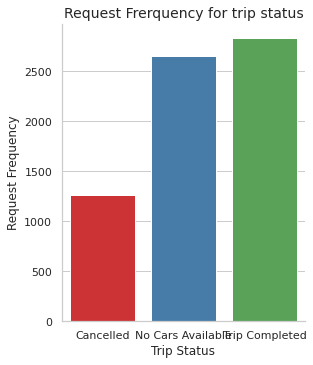

In [67]:
order_status = uber_data['Status'].sort_values(ascending = True).unique().tolist()
plot = sns.catplot(x = 'Status', kind = 'count', data = uber_data, palette = 'Set1', aspect = .9, order = order_status);
plt.title('Request Frerquency for trip status', fontsize = 14)
plt.xlabel('Trip Status', fontsize = 12)
plt.ylabel('Request Frequency', fontsize = 12)

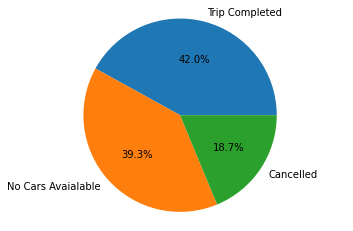

In [19]:
from pandas._libs.hashtable import value_count
uber_data.loc[(uber_data.Status == "Trip Completed"),'TripComp'] = 1
uber_data.loc[(uber_data.Status == "No Cars Available"), 'NCA'] = 1
uber_data.loc[(uber_data.Status == "Cancelled"), 'Cancel'] = 1

lables = ['Trip Completed', 'No Cars Avaialable', 'Cancelled']
sizes = [uber_data['TripComp'].value_counts()[1],
         uber_data['NCA'].value_counts()[1],
         uber_data['Cancel'].value_counts()[1],
         ]
plt.pie(sizes, labels = lables, autopct = '%1.1f%%', shadow = False)
plt.axis('equal')
plt.show()

From the above graphs we can conclude that No cars available is more than cancelled.

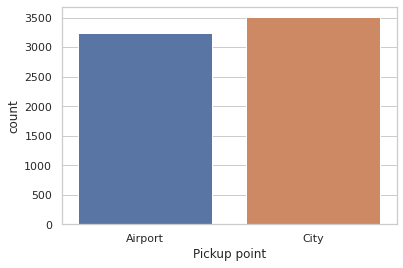

In [20]:
#Plot to compare the pickup points
sns.set(style = 'whitegrid')
ax = sns.countplot(x = 'Pickup point', data = uber_data)
plt.show()

There are 2 pickup points 

i) Airport ii)City

But from the graph we can see that City has more pickup points than airport.

Bivariate Analysis

In [21]:
#Analyse pickup points and status
uber_data.groupby(['Status', 'Pickup point']).size()

Status             Pickup point
Cancelled          Airport          198
                   City            1066
No Cars Available  Airport         1713
                   City             937
Trip Completed     Airport         1327
                   City            1504
dtype: int64

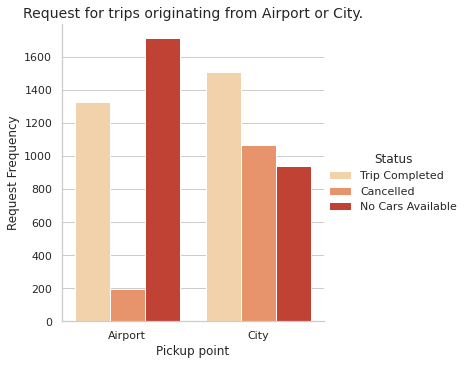

In [22]:
#Identify the number of requests for trips originating from airport and city for all the 3 trip status.
plot = sns.catplot(x = 'Pickup point', hue = 'Status', palette = 'OrRd', kind = 'count', data = uber_data)
plt.title('Request for trips originating from Airport or City.', fontsize = 14)
plt.xlabel('Pickup point', fontsize = 12)
plt.ylabel('Request Frequency', fontsize = 12)
plt.show()

From the above graph we see that

1. Trip Completed is more from City.
2. From Airport Cars are not available.

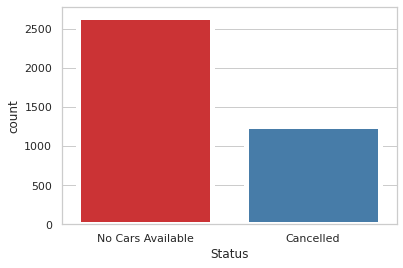

In [23]:
#Plot Showing frequency of requests that get cancelled or show 'No cars Available'
sns.countplot(x = 'Status', palette = 'Set1', linewidth = 5, data = uber_data[uber_data.Status != 'Trip Completed'],
              order = ['No Cars Available', 'Cancelled'])

From the above graph, we can clearly see that No cars available is more than Cancelled.

Derived Metrics and Analysis

Let Us see the status of cars vs Days of week

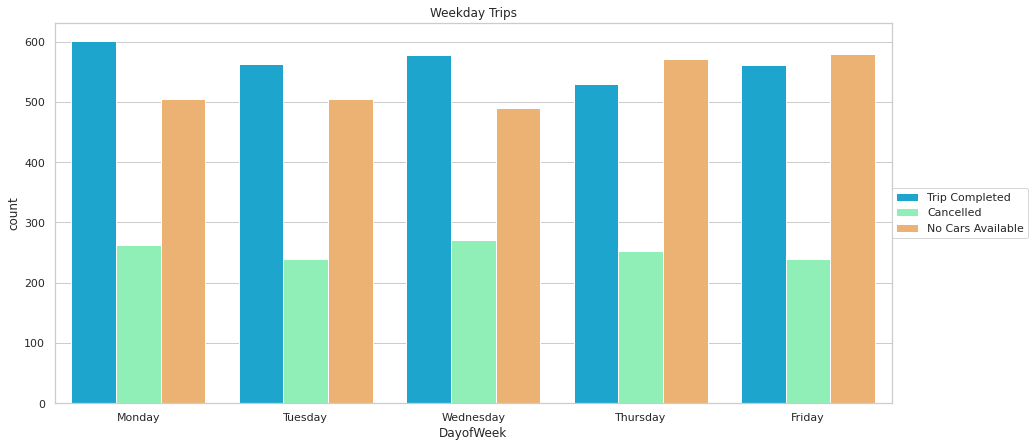

In [24]:
#Status for each day
fig, ax = plt.subplots(figsize = (15, 7))
plt.title("Weekday Trips")
ax = sns.countplot(x = "DayofWeek", hue = "Status", palette = "rainbow", data = uber_data)
plt.legend(bbox_to_anchor = (1.17, 0.5), loc = 'right')

As we can see Cancelled trips are almost the same throughout the week but initially during the beginning of the week, Trips Completed are more but gradually No Cars Available are more at the end of the week.

Let as see the number of request count per days

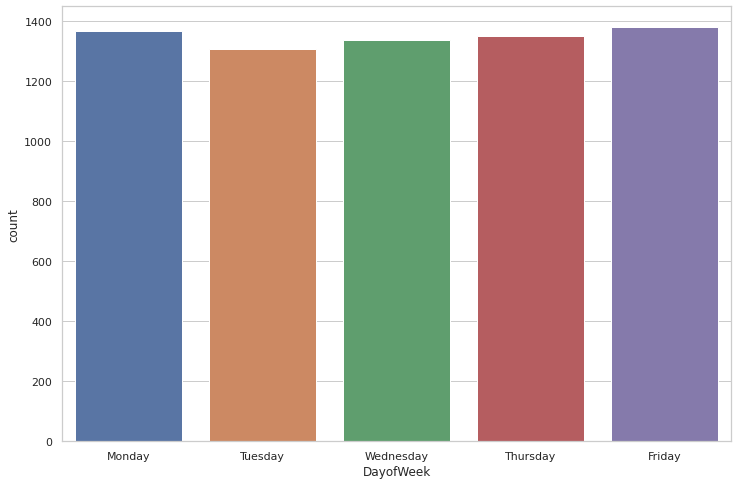

In [25]:
#looking to find the request count vs daysof week 
plt.figure(num = None, figsize = (12, 8), facecolor = 'w', edgecolor = 'k')
ax = sns.countplot(x = 'DayofWeek', data = uber_data)
plt.show()

From the above graph, there isn't much difference in request on weekdays

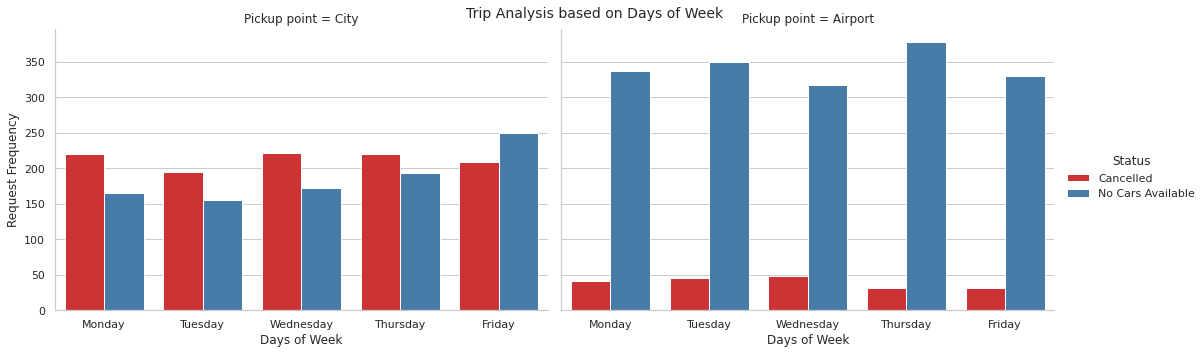

In [26]:
# Let us see the status vs days of week again each pick up point.
order_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
filter_trip_status = uber_data[(uber_data['Status'] == 'Cancelled') | (uber_data['Status'] == 'No Cars Available')]
plot = sns.catplot(x = 'DayofWeek', col = 'Pickup point', hue = 'Status', palette = 'Set1', kind = 'count', data = filter_trip_status, aspect = 1.5, order = order_days);
plot.fig.suptitle('Trip Analysis based on Days of Week', fontsize = 14)
plot.set_xlabels('Days of Week', fontsize = 12)
plot.set_ylabels('Request Frequency', fontsize = 12)
plt.show()

Following things can be seen from the above plots

1) For trips from city airport, except for friday, cancelled trips are more for all other days of week

2) For trips from airport city, for all days there are more number of No Cars Available

Now Let us see the request per hour.

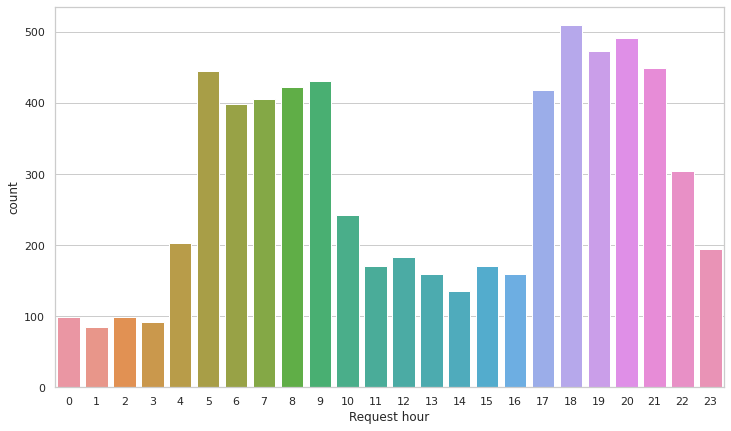

In [27]:
plt.figure(num = None, figsize = (12, 7), facecolor = 'w', edgecolor = 'k')
sns.countplot(x = 'Request hour', data = uber_data)
plt.show()

we can see that the in the early hours and late hours the no of request is much more.

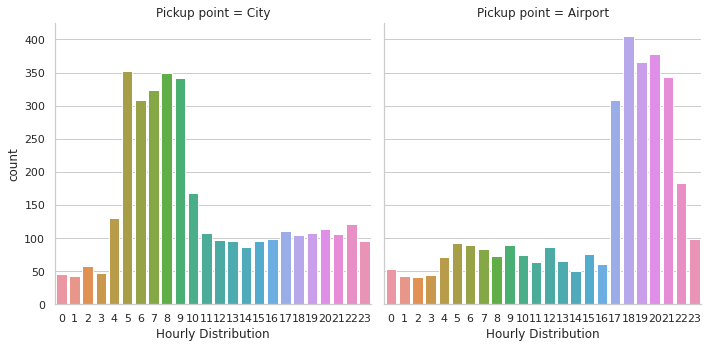

In [28]:
#Checking separate for Airport and City
sep = sns.catplot(x = "Request hour", col = "Pickup point", kind = "count", col_order = ['City', 'Airport'], data = uber_data)
sep.set_axis_labels("Hourly Distribution", "count")

Let us plot no of request per hour by status.

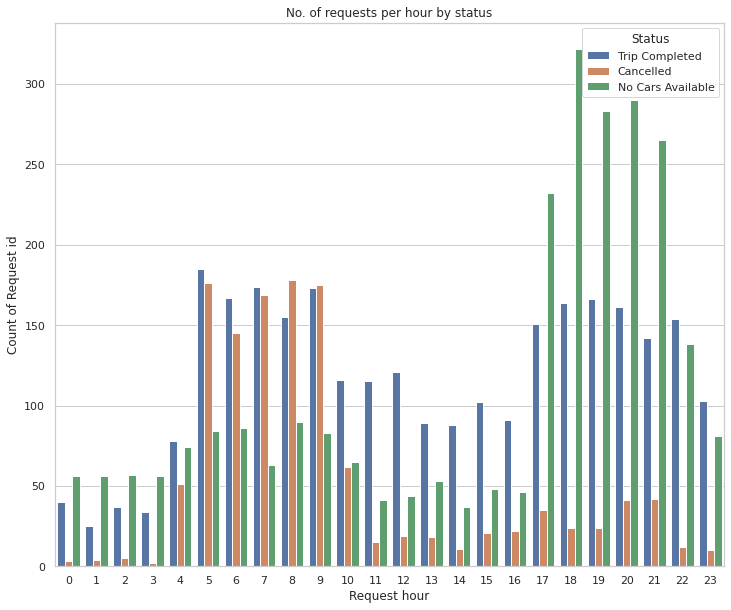

In [29]:
plt.figure(figsize = (12, 10))
sns.barplot(x = "Request hour", y = "Request id", hue = "Status", estimator = len, data = uber_data)
plt.title("No. of requests per hour by status")
plt.ylabel("Count of Request id")
plt.show()

Now plot a graph of request per hour of city & Airport

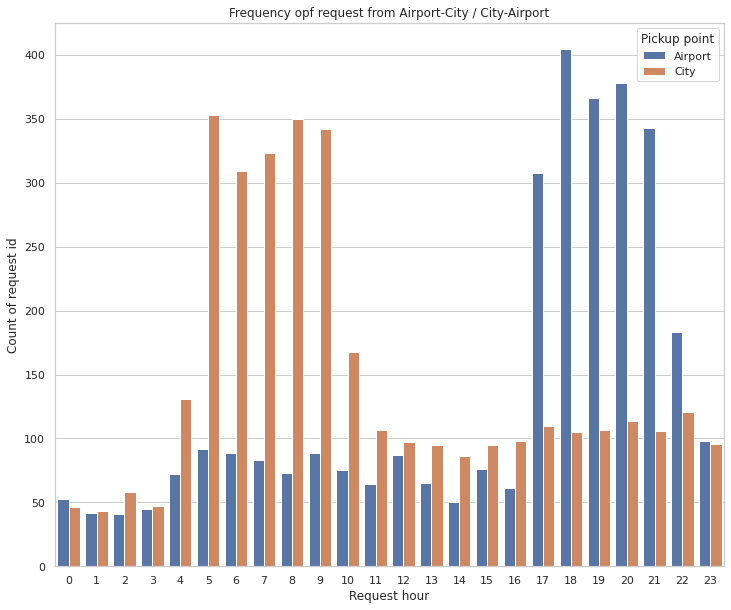

In [30]:
plt.figure(figsize = (12, 10))
sns.barplot(x = "Request hour", y = "Request id", hue = "Pickup point", estimator = len, data = uber_data)
plt.title("Frequency opf request from Airport-City / City-Airport")
plt.ylabel("Count of request id")
plt.show()

As we can see in the above plot that most of the people requests for the car in the Morning or Evening.

Morning and Evening are the time when there is rush.

Now ploting the request by timeslot as we diffrenciate earlier.

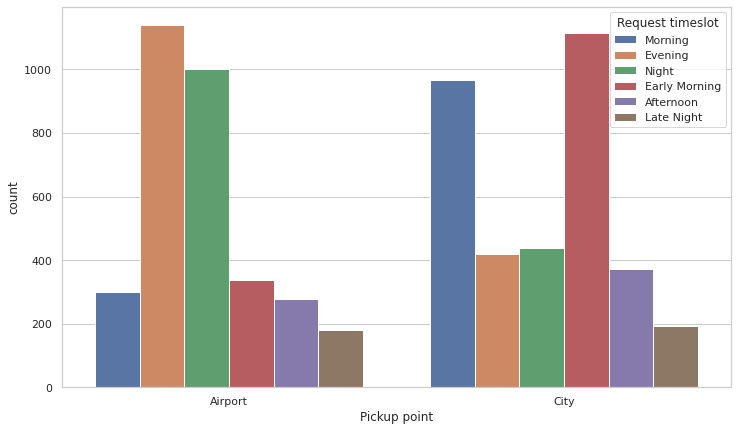

In [31]:
#Segmenting timeslotby pickup point
plt.figure(num = None, figsize = (12,7))
sns.countplot(x = 'Pickup point', hue = 'Request timeslot', data = uber_data)
plt.show()

From above plot it can be see that Airport has higher request in Evening and City has higher request in the Morning.

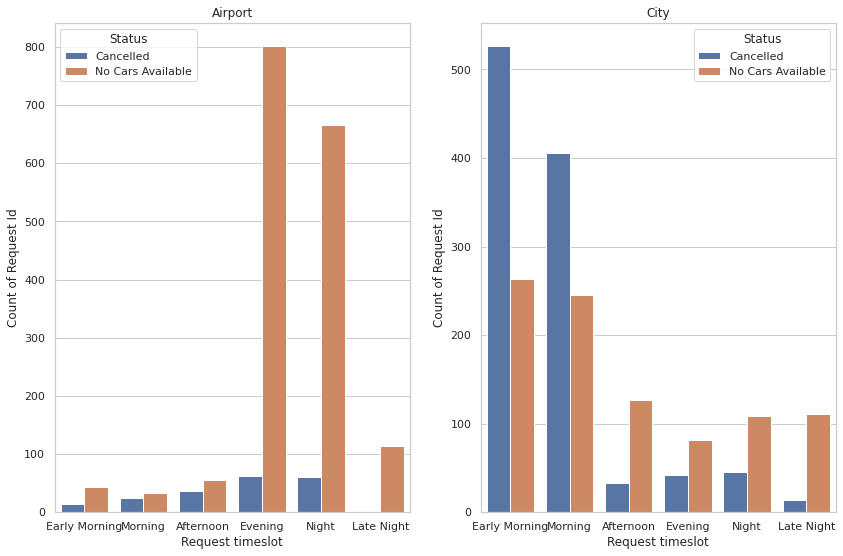

In [32]:
#plot of request frequency
order_timeslot = ['Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night', 'Late Night']
plt.figure(figsize = (14,9))
plt.subplot(1,2,1)
sns.barplot(x = 'Request timeslot', y = 'Request id', hue = 'Status', data = uber_data[(uber_data['Pickup point'] == 'Airport') & (uber_data['Status'] != 'Trip Completed')], estimator = len, order = order_timeslot)
plt.title('Airport')
plt.ylabel('Count of Request Id')


plt.subplot(1,2,2)
sns.barplot(x = 'Request timeslot', y = 'Request id', hue = 'Status', data = uber_data[(uber_data['Pickup point'] == 'City') & (uber_data['Status'] != 'Trip Completed')], estimator = len, order = order_timeslot)
plt.title('City')
plt.ylabel('Count of Request Id')
plt.show()

The above plot shows that

The highest cancellation is in early morning.

The highest no cars available is in evening & night.

Now checking with the trip status

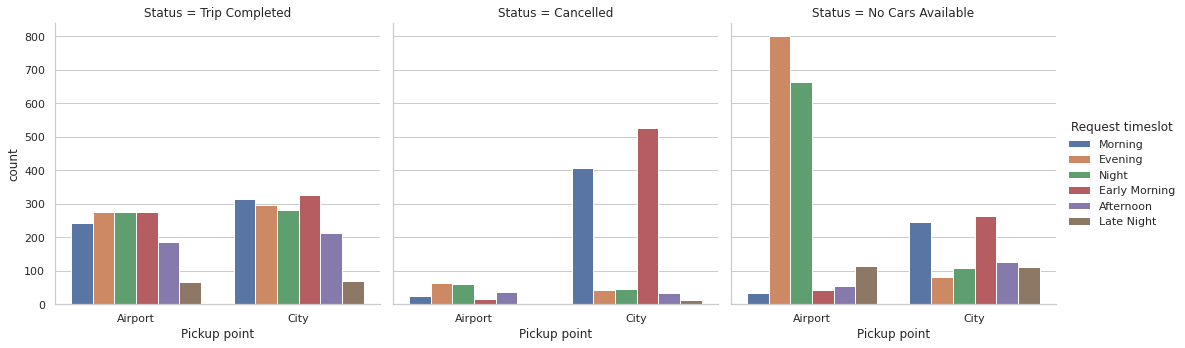

In [33]:
#segmenting the timeslot vs both Status and pickup point 

sns.catplot(x='Pickup point',col="Status", hue = 'Request timeslot',data=uber_data ,kind="count")
plt.show()

From the below plot it is evident that:

Airport requests during the evening slot(during which there is high airport request rate)there are no cars available

(Most city requests get cancelled in the morning slot(during which there is high city request rate)

Analyse the request frequency for Non Available Cars from airport & city for all timeslots.

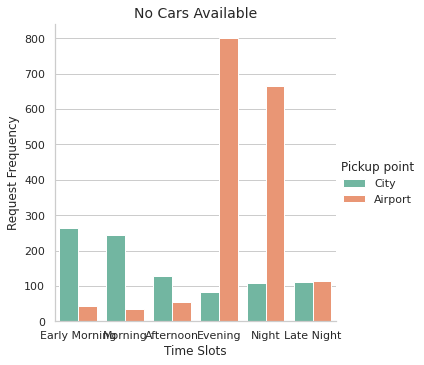

In [35]:
no_cars_available = uber_data[(uber_data['Status'] == 'No Cars Available')]
plot = sns.catplot(x = "Request timeslot", hue = "Pickup point", kind = "count", palette = "Set2", data = no_cars_available, order = order_timeslot)
plt.title("No Cars Available", fontsize = 14)
plt.xlabel("Time Slots", fontsize = 12)
plt.ylabel("Request Frequency", fontsize = 12)
plt.show()

Analyse the request frequency of cars for Cancelled Trips from airport & city for all timeslots.

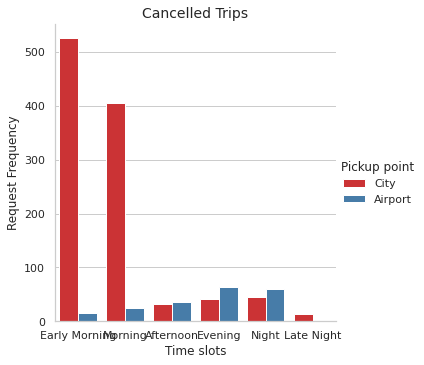

In [36]:
#Order of dislay of timeslot
cancelled = uber_data[(uber_data['Status'] == 'Cancelled')]
plot = sns.catplot(x = 'Request timeslot', hue = 'Pickup point', kind = 'count', palette = 'Set1', data = cancelled, order = order_timeslot)
plt.title("Cancelled Trips", fontsize = 14)
plt.xlabel("Time slots", fontsize = 12)
plt.ylabel("Request Frequency", fontsize = 12)
plt.show()

From the above graph it can be seen that maximum number of cars not available are from airport - city, during the evening hours followed by night.

Identify the approximate hour when more cars are unavailable during the identified timeslots and pickup point.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


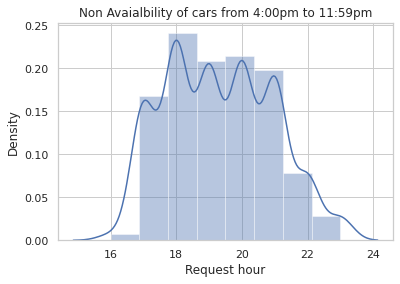

In [39]:
evening_unavaialable_cars = no_cars_available[(((no_cars_available['Request timeslot'] == 'Evening') |
                                                (no_cars_available['Request timeslot'] == 'Night')) &
                                               (no_cars_available['Pickup point'] == 'Airport'))]
plt.title("Non Avaialbility of cars from 4:00pm to 11:59pm")
sns.distplot(evening_unavaialable_cars['Request hour'], bins = 8)
plt.show()

The above plot shows that more number of cars are unavailable around 6:00 PM followed by 8:00 PM, 7:00 PM, 9:00 PM

Hence, the most pressing problem is as follows :

- More cars are cancelled from city - airport, for timeslots between 4:00 AM and 11:59 AM
- More cars are unavailable from airport - city, for timeslots between 4:00 PM and 11:59 PM


Supply demand gap can be calculated as follows :
- Demand = Number of cars requested
- Supply = Cars that completed the trips.
- Supply Demand Gap = Cancelled cars plus unavailable cars

In [40]:
#Demand column
uber_data.loc[(uber_data['Status'] == 'Trip Completed') | (uber_data['Status'] == 'No Cars Available') | (uber_data['Status'] == 'Cancelled'), 'demand'] = 'Demand' 

In [41]:
#Supply column
uber_data.loc[(uber_data['Status'] == 'Trip Completed'), 'supply'] = 'Supply'

In [42]:
#Gap column
uber_data.loc[(uber_data['Status'] == 'No Cars Available') | (uber_data['Status'] == 'Cancelled'), 'gap'] = 'Gap'

In [43]:
uber_data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Request hour,Request timeslot,DayofWeek,TripComp,NCA,Cancel,demand,supply,gap
0,619,Airport,1,Trip Completed,2016-07-11 11:51:00,11,Morning,Monday,1.0,NaN,NaN,Demand,Supply,NaN
1,867,Airport,1,Trip Completed,2016-07-11 17:57:00,17,Evening,Monday,1.0,NaN,NaN,Demand,Supply,NaN
2,1807,City,1,Trip Completed,2016-07-12 09:17:00,9,Morning,Tuesday,1.0,NaN,NaN,Demand,Supply,NaN
3,2532,Airport,1,Trip Completed,2016-07-12 21:08:00,21,Night,Tuesday,1.0,NaN,NaN,Demand,Supply,NaN
4,3112,City,1,Trip Completed,2016-07-13 08:33:16,8,Morning,Wednesday,1.0,NaN,NaN,Demand,Supply,NaN


In [44]:
uber_supply_demand = pd.DataFrame([uber_data.demand, uber_data.supply, uber_data.gap]).transpose()
uber_supply_demand.head()

,demand,supply,gap
0,Demand,Supply,NaN
1,Demand,Supply,NaN
2,Demand,Supply,NaN
3,Demand,Supply,NaN
4,Demand,Supply,NaN


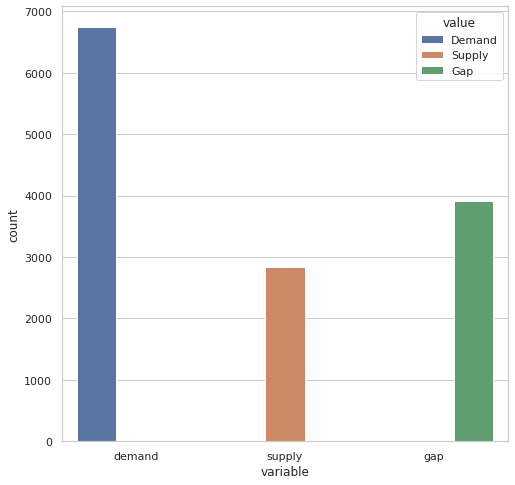

In [45]:
#Plotting demand and supply gap
plt.figure(num = None, figsize = (8, 8), facecolor = 'w', edgecolor = 'k')
sns.countplot(x = 'variable', hue = 'value', data = pd.melt(uber_supply_demand))
plt.show()

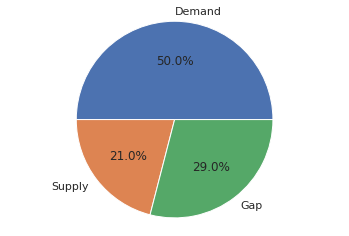

In [46]:
#percentage  distribution in pie Chart
uber_data.loc[(uber_data.Status == 'Trip Completed') | (uber_data.Status == 'Cancelled')| (uber_data.Status == 'No Cars Available'), 'demand'] =1
uber_data.loc[(uber_data.Status == 'Trip Completed'), 'supply']=1
uber_data.loc[(uber_data.Status == 'Cancelled')| (uber_data.Status == 'No Cars Available'), 'gap'] =1


labels = ['Demand', 'Supply', 'Gap']
sizes = [uber_data['demand'].value_counts()[1],
         uber_data['supply'].value_counts()[1],
         uber_data['gap'].value_counts()[1],
         ]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False)
plt.axis('equal')
plt.show()

In [47]:
# Create a new column to determine supply vs supply demand gap
# function returns the value Supply or Supply Demand Gap based on the trip status

def setSupplyDemandGap(x):
  if x == 'Trip Completed':
    return 'Supply'
  else:
    return 'Supply Demand Gap'

uber_data['uber supply demand gap'] = uber_data['Status'].apply(setSupplyDemandGap)
uber_data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Request hour,Request timeslot,DayofWeek,TripComp,NCA,Cancel,demand,supply,gap,uber supply demand gap
0,619,Airport,1,Trip Completed,2016-07-11 11:51:00,11,Morning,Monday,1.0,NaN,NaN,1,1,NaN,Supply
1,867,Airport,1,Trip Completed,2016-07-11 17:57:00,17,Evening,Monday,1.0,NaN,NaN,1,1,NaN,Supply
2,1807,City,1,Trip Completed,2016-07-12 09:17:00,9,Morning,Tuesday,1.0,NaN,NaN,1,1,NaN,Supply
3,2532,Airport,1,Trip Completed,2016-07-12 21:08:00,21,Night,Tuesday,1.0,NaN,NaN,1,1,NaN,Supply
4,3112,City,1,Trip Completed,2016-07-13 08:33:16,8,Morning,Wednesday,1.0,NaN,NaN,1,1,NaN,Supply


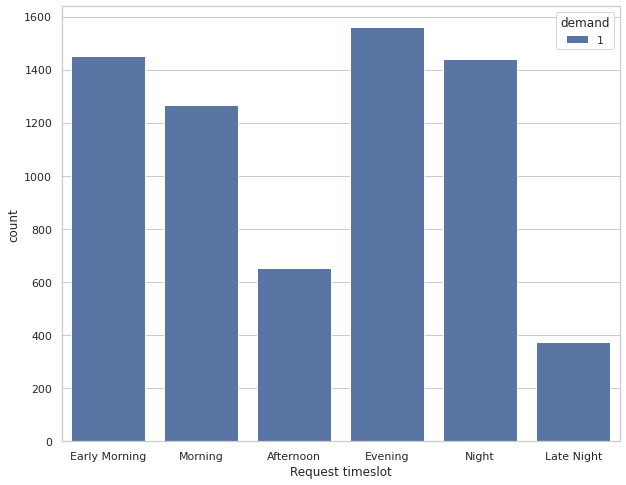

In [49]:
#segmenting demand across the request time slot
plt.figure(num = None, figsize = (10, 8), facecolor = 'w', edgecolor = 'k')
sns.countplot(x = 'Request timeslot', hue = 'demand', data = uber_data, order = order_timeslot)
plt.show()

As seen in the above graph we can say that demand is high in evening ,early morning, morning & night.

We cannot say at which pickup point the demand is high so let us plot demand at eacch pickup point.

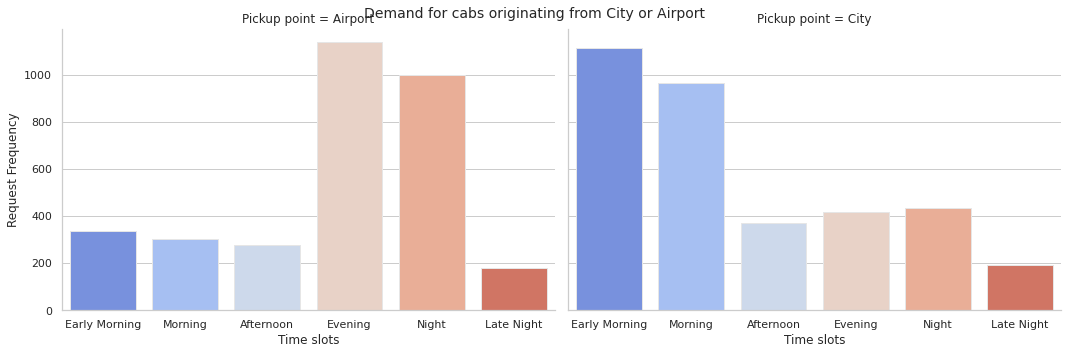

In [52]:
plot = sns.catplot(x='Request timeslot', col="Pickup point", kind="count", palette="coolwarm", edgecolor=".9", aspect = 1.5, 
          data=uber_data, order = order_timeslot)
plot.fig.suptitle("Demand for cabs originating from City or Airport", fontsize = 14)
plot.set_xlabels("Time slots", fontsize = 12)
plot.set_ylabels("Request Frequency", fontsize = 12)
plt.show()

From the above plots it is clear that :

- For airport pickups, demand is more during the evening and night hours
- For city pickups, demand is more during the early morning and morning

Let us find the time slots when the highest supply demand gap exists

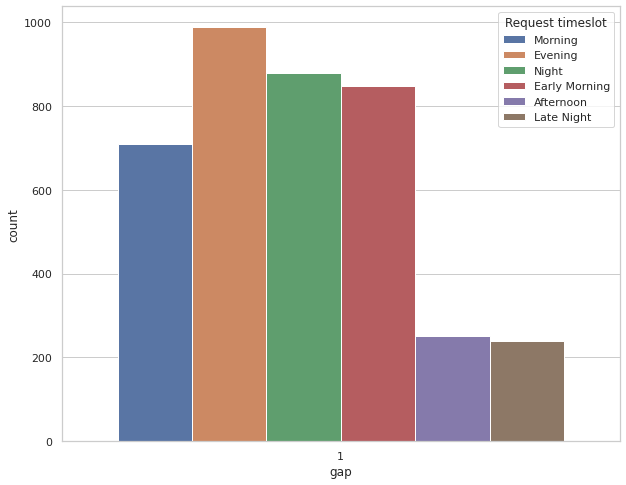

In [53]:
#Checking gap at each timeslot
plt.figure(num = None, figsize = (10, 8), facecolor = 'w', edgecolor = 'k')
ax = sns.countplot(x = 'gap', hue = 'Request timeslot', data = uber_data)
total = len(uber_data['gap'])
plt.show()

Above graph show that the demand in early Morning , evening and night since it is the rush time.

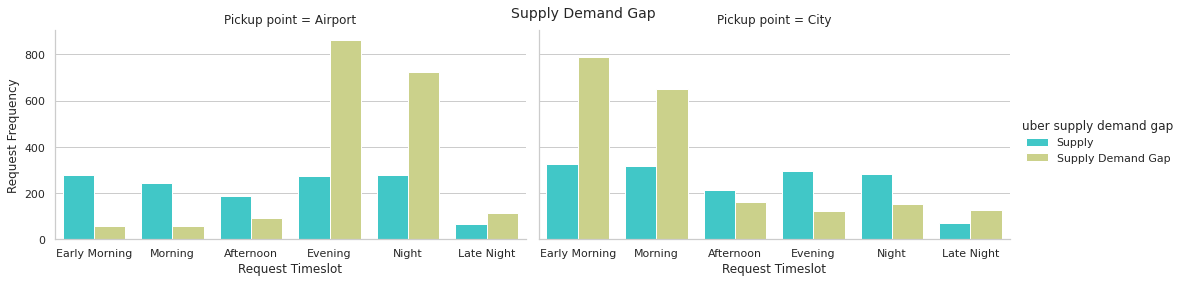

In [56]:
# Let us Check the Supply demand gap or gap at both pickup point.
plot = sns.catplot(x="Request timeslot", hue="uber supply demand gap", col = 'Pickup point', data=uber_data, palette='rainbow', 
            kind="count", height=4, aspect = 1.8, order = order_timeslot);

plot.fig.suptitle('Supply Demand Gap', fontsize=14)
plot.set_xlabels('Request Timeslot', fontsize=12)
plot.set_ylabels('Request Frequency', fontsize=12)
plt.show()

The above plot shows the following :
The gap is more in the evening and night for pickup point Airport.
The gap is more in the early morning and morning for pickup point City.

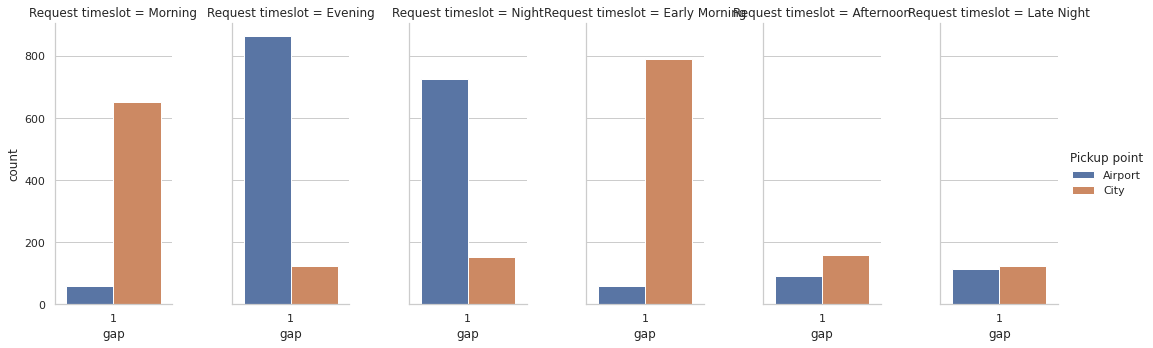

In [58]:
# Checking the gap at every timeslot vs both pickup point.
sns.catplot(x='gap',col="Request timeslot", hue = 'Pickup point',data=uber_data ,kind="count", height=5,aspect= 0.5,
            ci=85)
plt.show()

<Figure size 936x360 with 0 Axes>

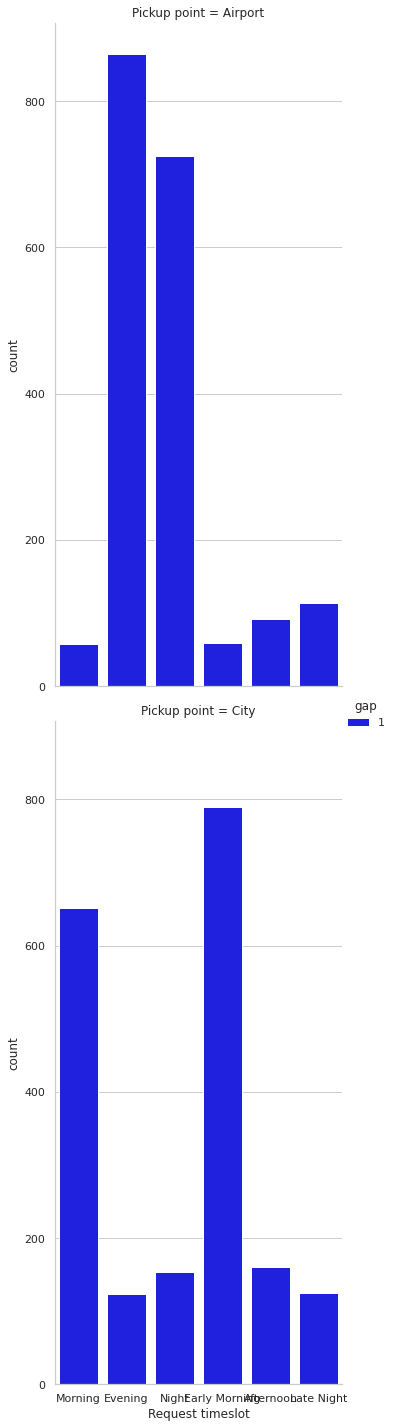

In [60]:
# Checking the gap at every hour vs both the pickup point
plt.figure(num = None, figsize = (13, 5), facecolor = 'w', edgecolor = 'k')
sns.catplot(x = 'Request timeslot', col = 'Pickup point', hue = 'gap', data = uber_data, kind = 'count', height = 10, aspect = 0.5, ci = 85, col_wrap = 1, palette = sns.color_palette(['Blue']))
plt.show()

Observation so far:

The problematic status are 'cancelled' and 'no cars available' as it leads to potential loss of revenue. We observed the hightest value of:

Status: "No car available"
Where is it happening: 

Airport - i.e airport to city
When is it happening: Evening 

Status: "Cancelled"

Where is it happening: City - i.e city to airport
When is it happening: Morning

------------------------------------------------------------------------------

The above points are in sync with highest request rates coming from morning and evening slot.

To make our analayse our observation so far, we further looked into the 'gap'. This again is in sync with above observations. The 'gap' which exists are the hightest:

Status: "No car available"
Where is it happening: Airport - i.e airport to city
When is it happening: Evening 

Status: "Cancelled"
Where is it happening: City - i.e city to airport
When is it happening: Morning. 

And vice versa is not true:

   1. Morning hours :There is no high demand for cabs from airport to city 
   2. Evening hours: There is no high demand for cabs from city to airport

This tells us that there are more outbound flights in the morning and inbound flights in the evening.

The reason for the issue:
In the morning hours: 

Though there is high demand for cabs from city to airport, the vice versa is not true.
                      Hence the driver tends to 'cancel' the request as getting a return trip from airport 
                      to city would be tough.

In the evening hours: 

Though there is high demand for cabs from airport to city, the vice versa is not true.
                      Hence 'no cars available' in the airport is the hightest in the evening.

Possible suggestions to fill the supply demand gap:
1. Provide incentives for airport trips during peak time.
2. Assigning few extra cabs specially to the airport trips.
3. Fixing a base price for drivers idle time in the airport or to come back to the city without any passenger.
4. Impose penalty for cancellation of requests by the drivers. Set a threshold for the maximum cancellation per day.
5. Promote continuous trip to airport with incentives.
6. Promote advance booking to airports and at the same time keeping drivers updated will the flight schedule with help them plan their work and they can accept the request as per their work plan.